In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [66]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy
import numpy as np

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [67]:
df = pd.read_csv('./bank-additional-full.csv', sep=";")

In [68]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Answer:
**`The objective of the task is to optimize the marketing campaign. This includes identifying the important factors and their impact in the Decision Making of a customer. We also need to create a model that gives us an idea of likelihood of a customer bying the term plan.`**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [69]:
df_master=deepcopy(df)

In [70]:
df=deepcopy(df_master)

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [73]:
mapping = {"yes": 1, "no": 0}
df['y'] = df['y'].replace(mapping).astype(np.float64)

In [74]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [8,6]

## Let us visualize a few features and their trend

In [75]:
for col in df.columns:
    print(col.upper(), '--', df[col].nunique(), '--')
    print(list(df[col].unique())[:5], '\n')

AGE -- 78 --
[56, 57, 37, 40, 45] 

JOB -- 12 --
['housemaid', 'services', 'admin.', 'blue-collar', 'technician'] 

MARITAL -- 4 --
['married', 'single', 'divorced', 'unknown'] 

EDUCATION -- 8 --
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course'] 

DEFAULT -- 3 --
['no', 'unknown', 'yes'] 

HOUSING -- 3 --
['no', 'yes', 'unknown'] 

LOAN -- 3 --
['no', 'yes', 'unknown'] 

CONTACT -- 2 --
['telephone', 'cellular'] 

MONTH -- 10 --
['may', 'jun', 'jul', 'aug', 'oct'] 

DAY_OF_WEEK -- 5 --
['mon', 'tue', 'wed', 'thu', 'fri'] 

DURATION -- 1544 --
[261, 149, 226, 151, 307] 

CAMPAIGN -- 42 --
[1, 2, 3, 4, 5] 

PDAYS -- 27 --
[999, 6, 4, 3, 5] 

PREVIOUS -- 8 --
[0, 1, 2, 3, 4] 

POUTCOME -- 3 --
['nonexistent', 'failure', 'success'] 

EMP.VAR.RATE -- 10 --
[1.1, 1.4, -0.1, -0.2, -1.8] 

CONS.PRICE.IDX -- 26 --
[93.994, 94.465, 93.918, 93.444, 93.798] 

CONS.CONF.IDX -- 26 --
[-36.4, -41.8, -42.7, -36.1, -40.4] 

EURIBOR3M -- 316 --
[4.857, 4.856, 4.855, 4.859, 4.86

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [77]:
num_cols=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',\
          'cons.conf.idx','euribor3m','nr.employed']
cat_cols=['job','marital','education','default','housing','poutcome','loan','contact','month','day_of_week']
target_col=['y']

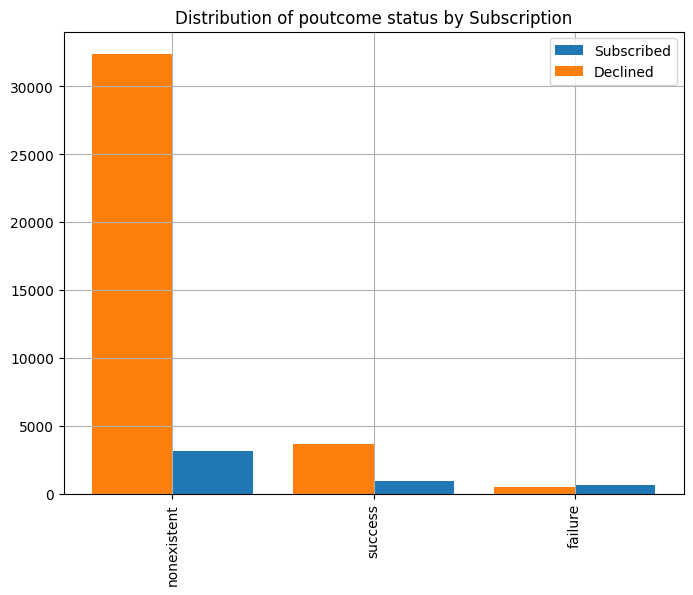

In [78]:
# Distribution Plots for Categorical Variables

var='poutcome'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

In [79]:
## We can see that success rate is higher if the last campaign was failed.

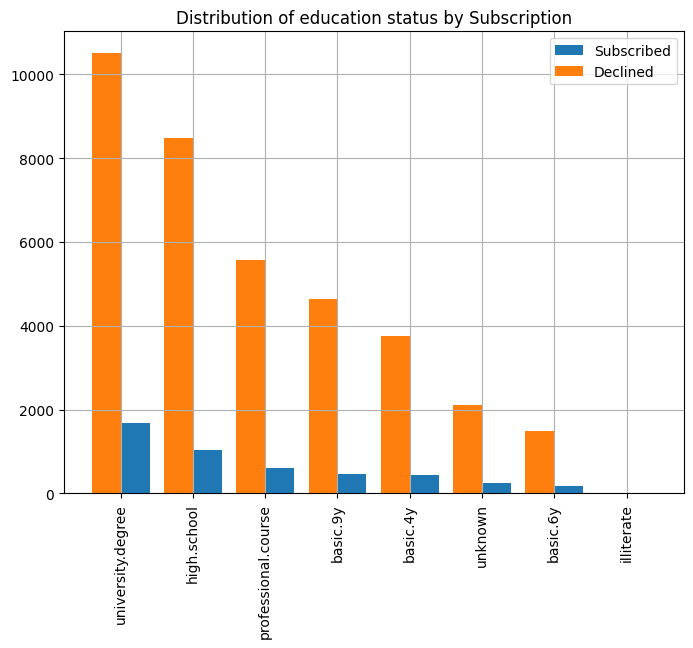

In [80]:
# Distribution Plots for Categorical Variables

var='education'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

In [81]:
# There is no clear trend in terms of education, but it certainly has some impact. This would a useful feature.

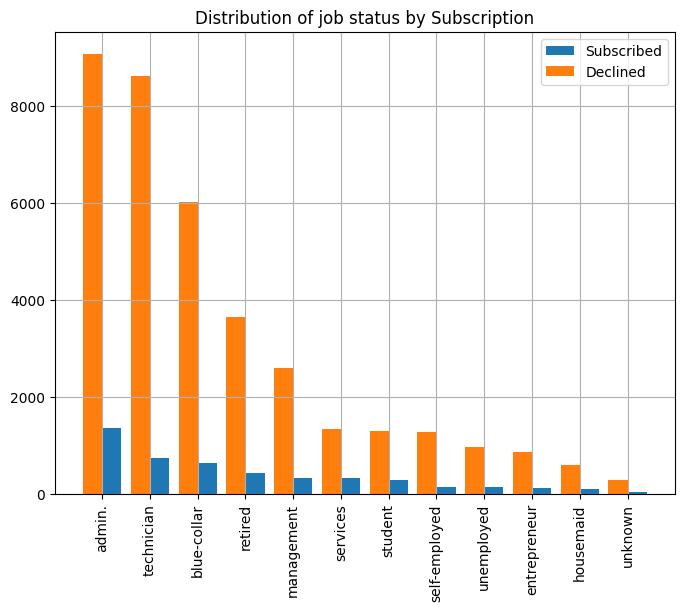

In [82]:
# Distribution Plots for Categorical Variables

var='job'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

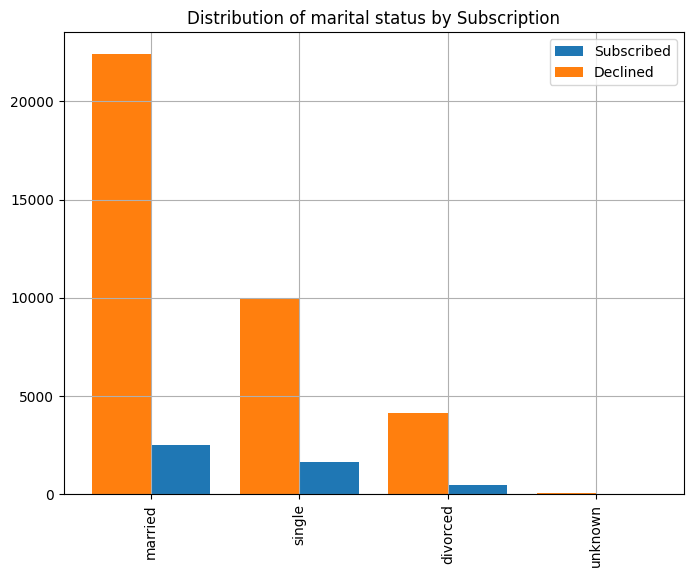

In [83]:
# Distribution Plots for Discrete Variables

var='marital'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

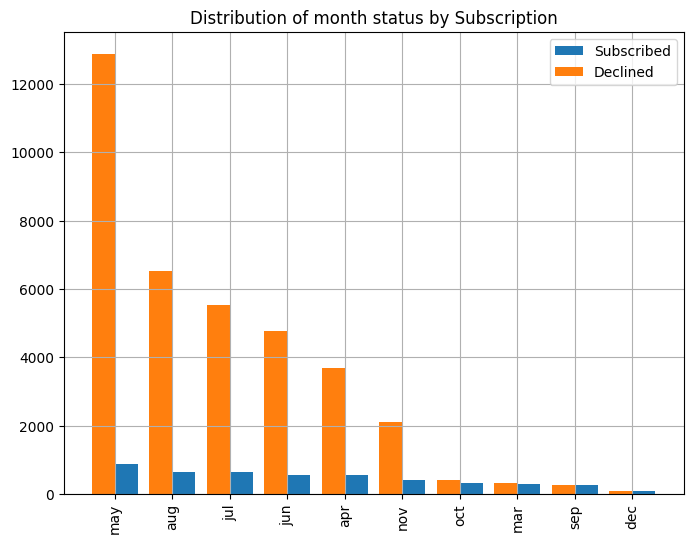

In [84]:
# Distribution Plots for Discrete Variables

var='month'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

In [85]:
# Success ratio is better in the months of March, September, October and December. This could also be because
# of the sampling bias.

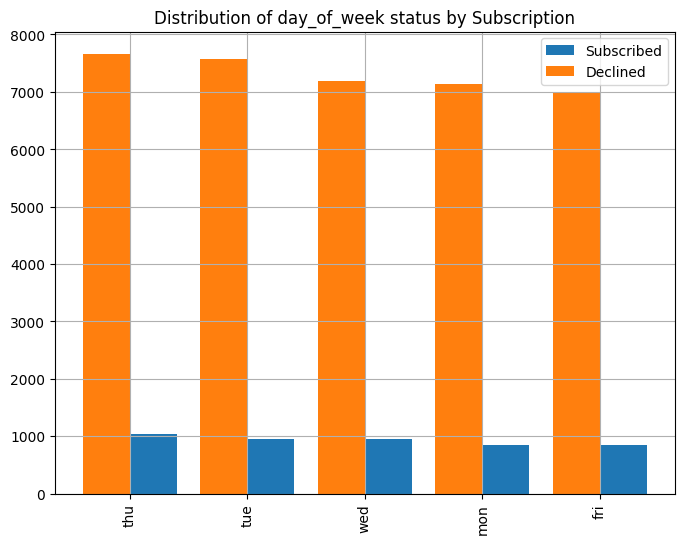

In [86]:
# Distribution Plots for Discrete Variables

var='day_of_week'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

In [87]:
# Day of the week doesn't seem to have any varying impact. We would drop it for purpose of modeling.

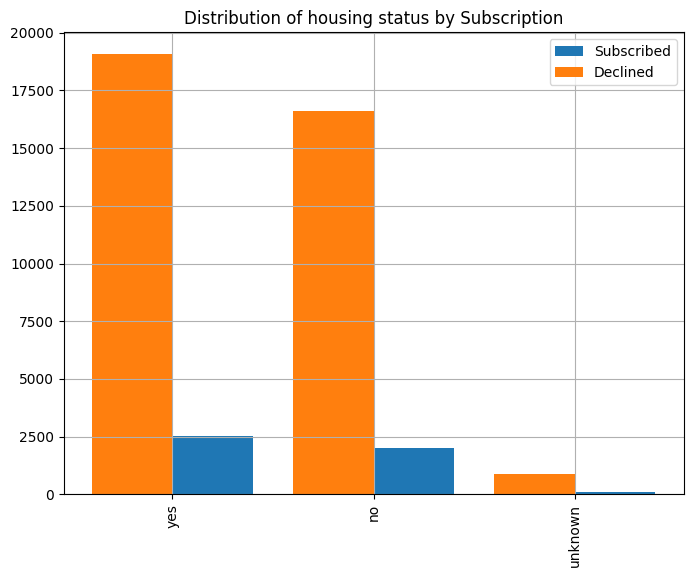

In [88]:
# Distribution Plots for Discrete Variables

var='housing'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

In [89]:
# A slight difference success rate based on Housing status is present. We would consider this feature for
# modeling.

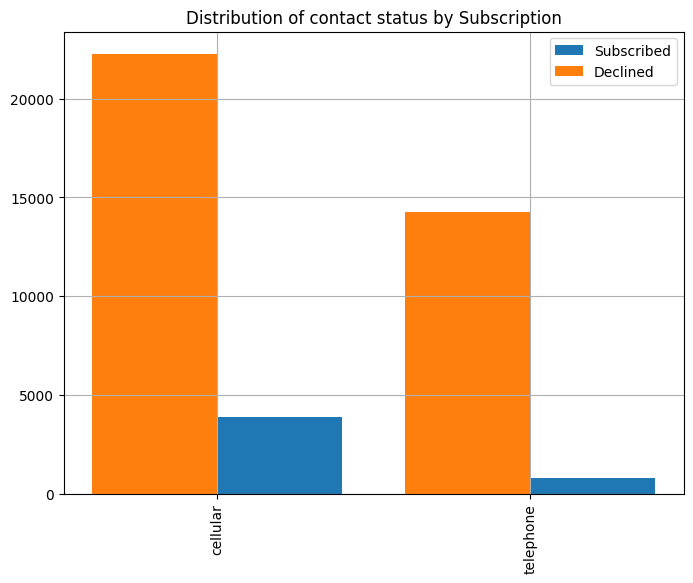

In [90]:
# Distribution Plots for Discrete Variables

var='contact'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

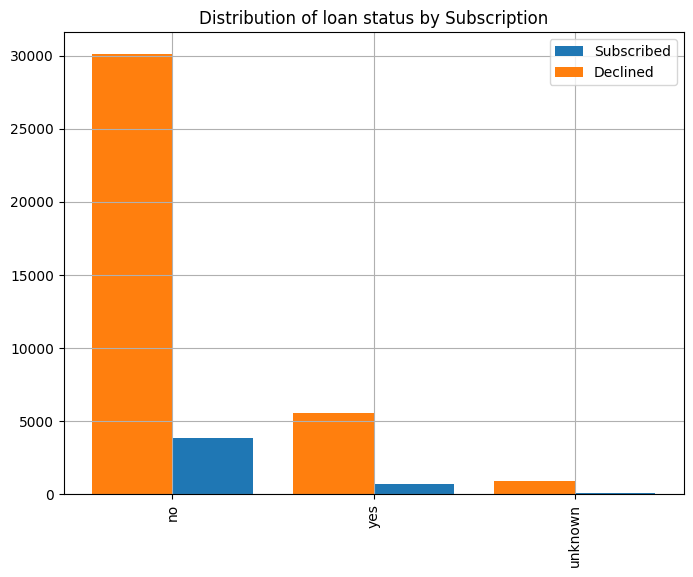

In [91]:
# Distribution Plots for Discrete Variables

var='loan'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

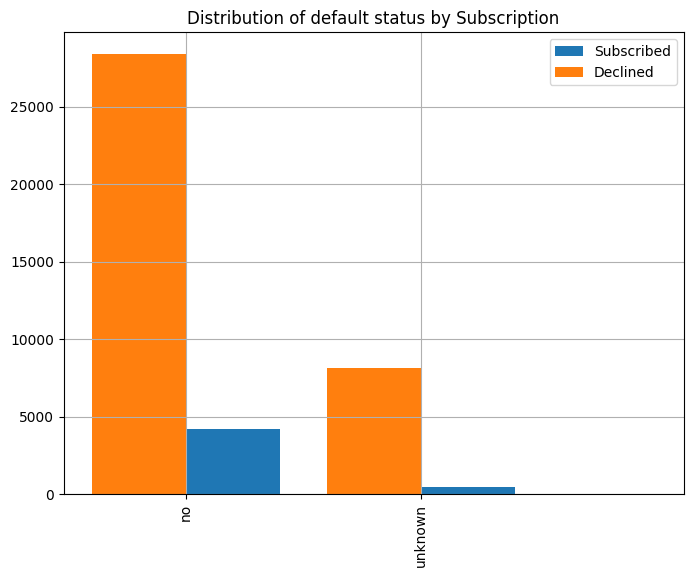

In [92]:
# Distribution Plots for Discrete Variables

var='default'
datax=df.loc[df.y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=df.loc[df.y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='Subscribed')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='Declined')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.title('Distribution of '+var+' status by Subscription')
plt.grid()
plt.legend()
plt.show()

In [93]:
# There is a significant difference in success rate based on Default Status.

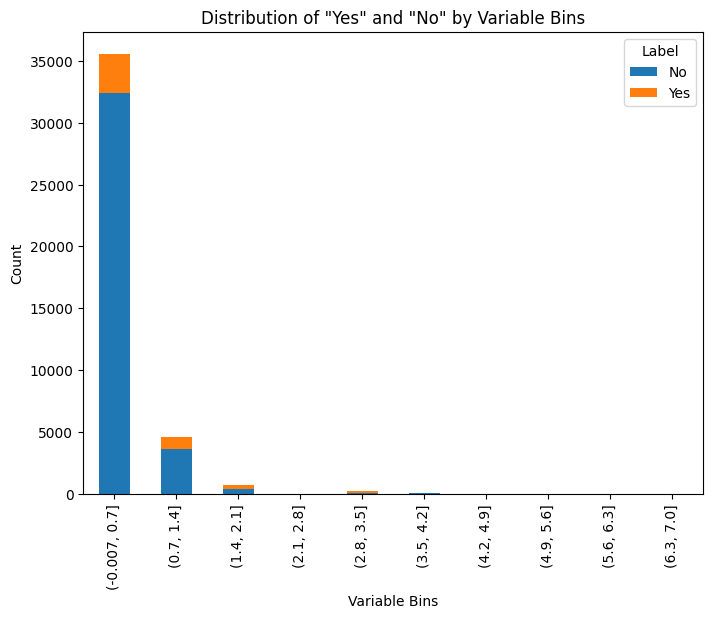

In [94]:
# Distribution of continuous data based on Binary Label

var='previous'
num_bins = 10
df['Variable_Bins'] = pd.cut(df[var], bins=num_bins)

# Group the data by bins and labels, and count the occurrences
bin_counts = df.groupby(['Variable_Bins','y'])['y'].count().unstack().fillna(0)

# Create a side-by-side bar plot
bin_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of "Yes" and "No" by Variable Bins')
plt.xlabel('Variable Bins')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No', 'Yes'])
plt.show()

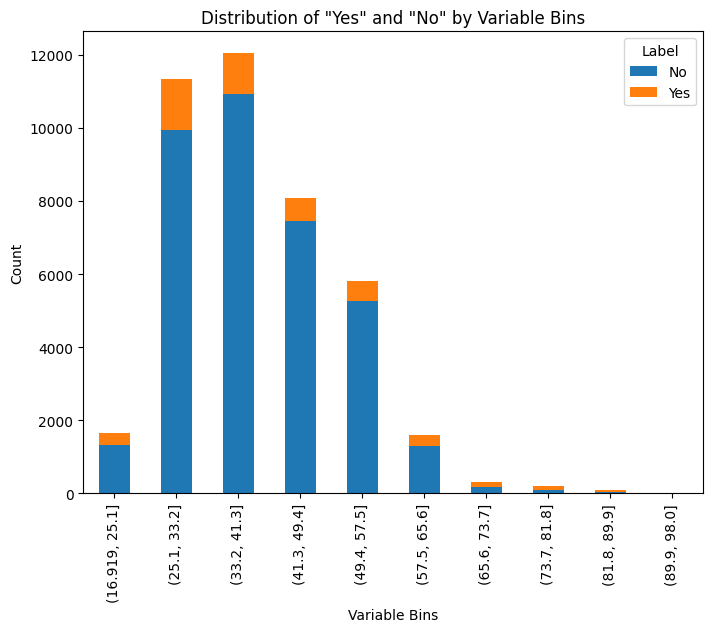

In [95]:
# Distribution of continuous data based on Binary Label

var='age'
num_bins = 10
df['Variable_Bins'] = pd.cut(df[var], bins=num_bins)

# Group the data by bins and labels, and count the occurrences
bin_counts = df.groupby(['Variable_Bins','y'])['y'].count().unstack().fillna(0)

# Create a side-by-side bar plot
bin_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of "Yes" and "No" by Variable Bins')
plt.xlabel('Variable Bins')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No', 'Yes'])
plt.show()

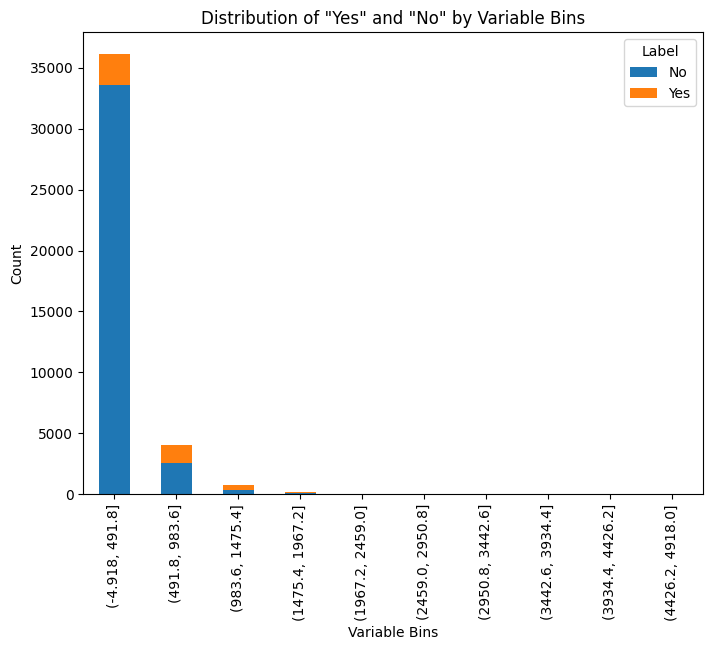

In [96]:
# Distribution of continuous data based on Binary Label

var='duration'
num_bins = 10
df['Variable_Bins'] = pd.cut(df[var], bins=num_bins)

# Group the data by bins and labels, and count the occurrences
bin_counts = df.groupby(['Variable_Bins','y'])['y'].count().unstack().fillna(0)

# Create a side-by-side bar plot
bin_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of "Yes" and "No" by Variable Bins')
plt.xlabel('Variable Bins')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No', 'Yes'])
plt.show()

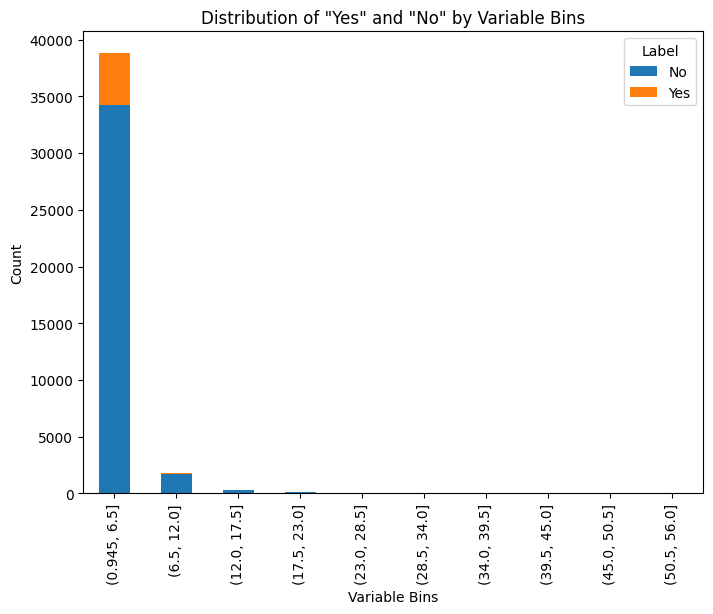

In [97]:
# Distribution of continuous data based on Binary Label

var='campaign'
num_bins = 10
df['Variable_Bins'] = pd.cut(df[var], bins=num_bins)

# Group the data by bins and labels, and count the occurrences
bin_counts = df.groupby(['Variable_Bins','y'])['y'].count().unstack().fillna(0)

# Create a side-by-side bar plot
bin_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of "Yes" and "No" by Variable Bins')
plt.xlabel('Variable Bins')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No', 'Yes'])
plt.show()

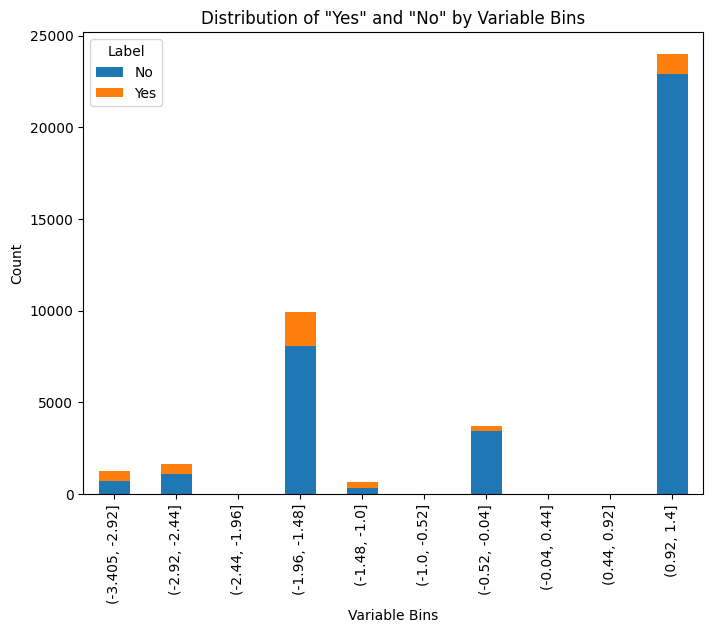

In [98]:
# Distribution of continuous data based on Binary Label

var='emp.var.rate'
num_bins = 10
df['Variable_Bins'] = pd.cut(df[var], bins=num_bins)

# Group the data by bins and labels, and count the occurrences
bin_counts = df.groupby(['Variable_Bins','y'])['y'].count().unstack().fillna(0)

# Create a side-by-side bar plot
bin_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of "Yes" and "No" by Variable Bins')
plt.xlabel('Variable Bins')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No', 'Yes'])
plt.show()

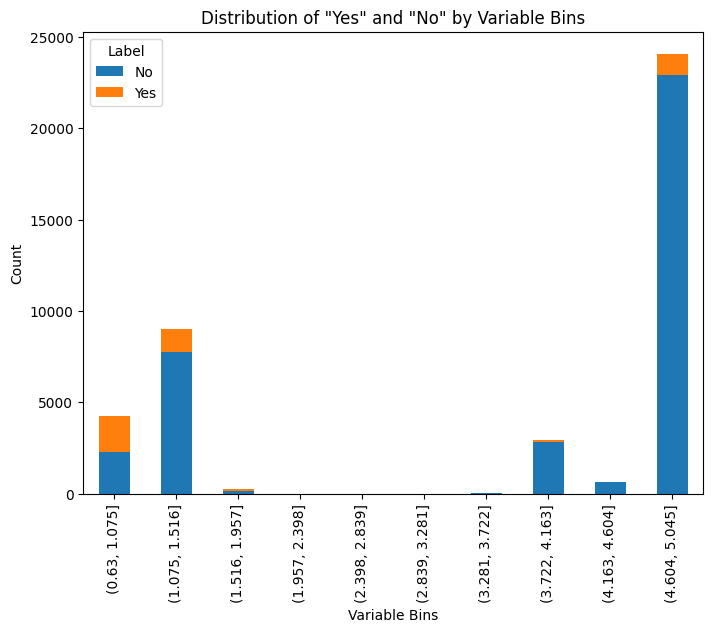

In [99]:
# Distribution of continuous data based on Binary Label

var='euribor3m'
num_bins = 10
df['Variable_Bins'] = pd.cut(df[var], bins=num_bins)

# Group the data by bins and labels, and count the occurrences
bin_counts = df.groupby(['Variable_Bins','y'])['y'].count().unstack().fillna(0)

# Create a side-by-side bar plot
bin_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of "Yes" and "No" by Variable Bins')
plt.xlabel('Variable Bins')
plt.ylabel('Count')
plt.legend(title='Label', labels=['No', 'Yes'])
plt.show()

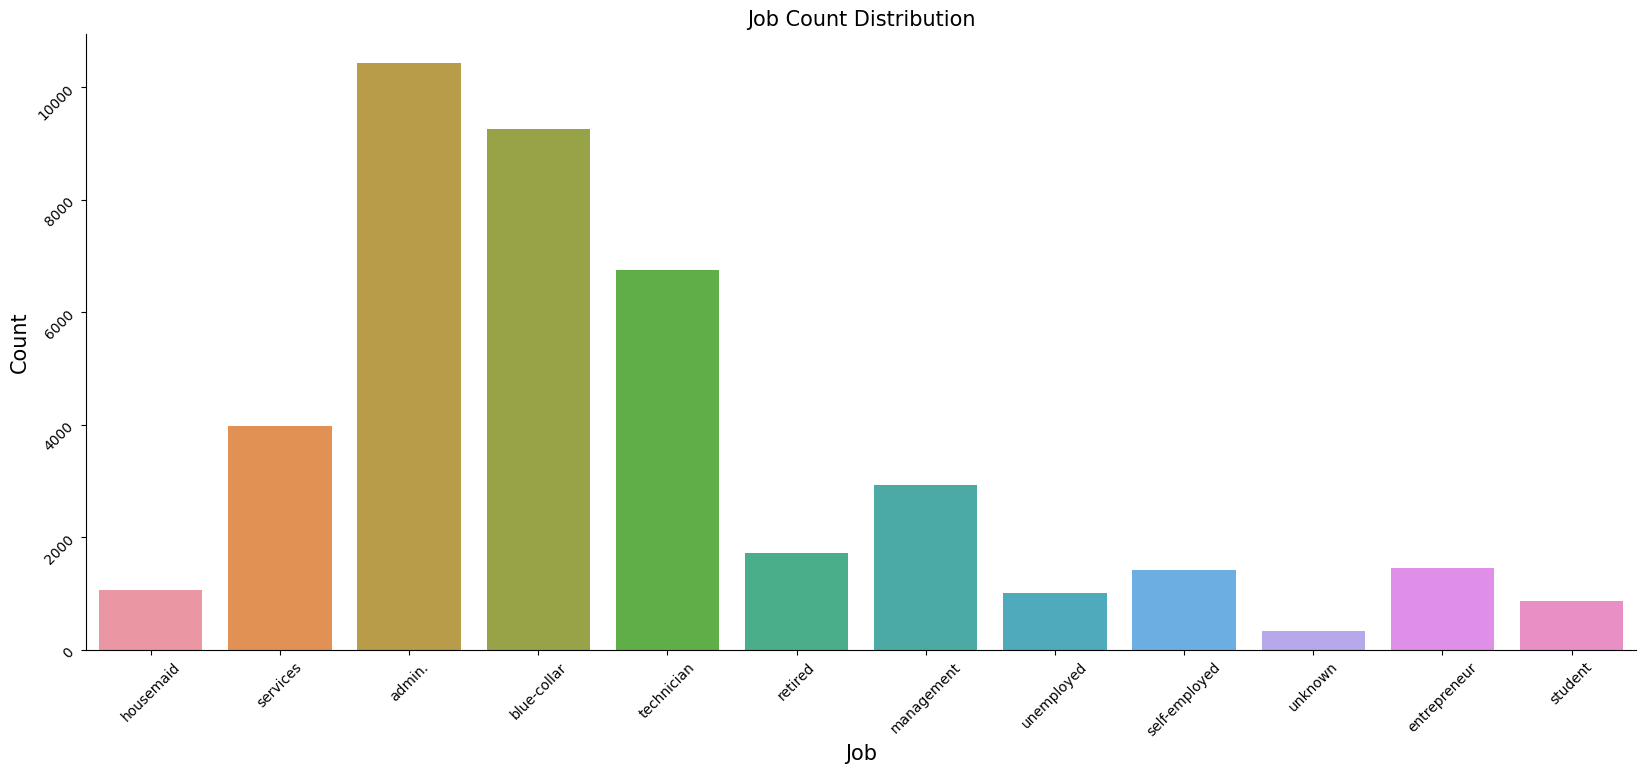

In [100]:
# Let us see how some features are distributed

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data=df)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Job Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 10, rotation=45)
sns.despine()

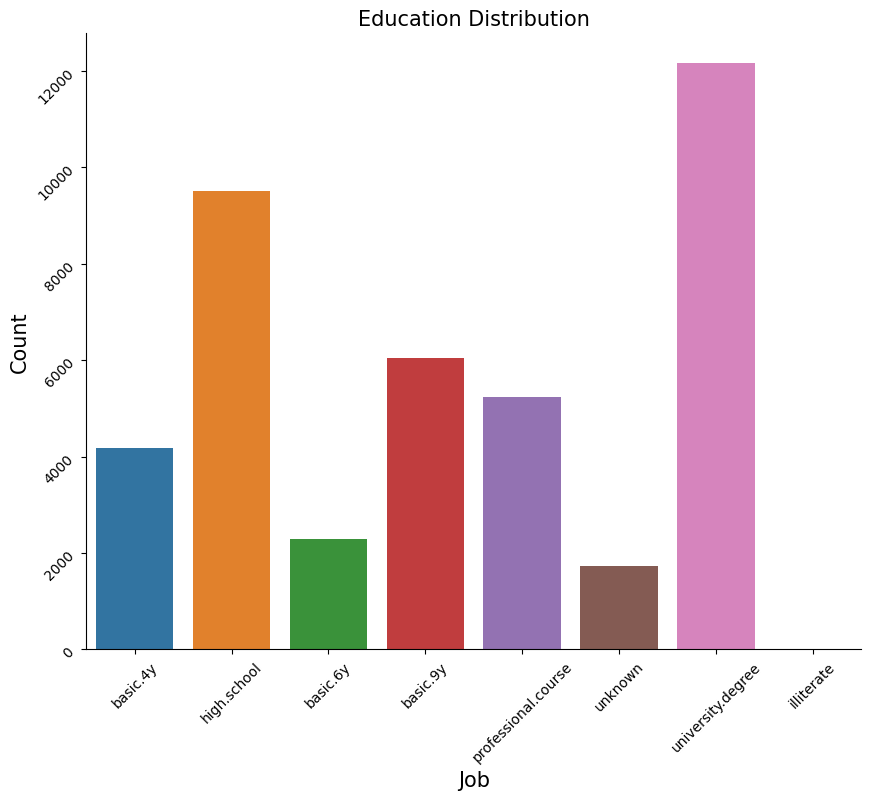

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'education', data=df)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Education Distribution', fontsize = 15)
ax.tick_params(labelsize = 10, rotation=45)
sns.despine()

In [102]:
for col in df.columns:
    print(col.upper(), '--', df[col].nunique(), '--')
    print(list(df[col].unique())[:5])

AGE -- 78 --
[56, 57, 37, 40, 45]
JOB -- 12 --
['housemaid', 'services', 'admin.', 'blue-collar', 'technician']
MARITAL -- 4 --
['married', 'single', 'divorced', 'unknown']
EDUCATION -- 8 --
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course']
DEFAULT -- 3 --
['no', 'unknown', 'yes']
HOUSING -- 3 --
['no', 'yes', 'unknown']
LOAN -- 3 --
['no', 'yes', 'unknown']
CONTACT -- 2 --
['telephone', 'cellular']
MONTH -- 10 --
['may', 'jun', 'jul', 'aug', 'oct']
DAY_OF_WEEK -- 5 --
['mon', 'tue', 'wed', 'thu', 'fri']
DURATION -- 1544 --
[261, 149, 226, 151, 307]
CAMPAIGN -- 42 --
[1, 2, 3, 4, 5]
PDAYS -- 27 --
[999, 6, 4, 3, 5]
PREVIOUS -- 8 --
[0, 1, 2, 3, 4]
POUTCOME -- 3 --
['nonexistent', 'failure', 'success']
EMP.VAR.RATE -- 10 --
[1.1, 1.4, -0.1, -0.2, -1.8]
CONS.PRICE.IDX -- 26 --
[93.994, 94.465, 93.918, 93.444, 93.798]
CONS.CONF.IDX -- 26 --
[-36.4, -41.8, -42.7, -36.1, -40.4]
EURIBOR3M -- 316 --
[4.857, 4.856, 4.855, 4.859, 4.86]
NR.EMPLOYED -- 11 --
[5191.0, 5228

In [103]:
drop_cols=['day_of_week']

In [104]:
df=df.drop(drop_cols, axis=1)
df.shape

(41188, 21)

In [105]:
cat_cols.remove('day_of_week')
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'poutcome',
 'loan',
 'contact',
 'month']

In [106]:
# These categorical columns will be one-hot encoded as they are not Ordinal.

In [107]:
df.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [108]:
mapping = {"cellular": 1, "telephone": 0}
df['contact'] = df['contact'].replace(mapping).astype(np.float64)

In [109]:
df = pd.get_dummies(df, columns=cat_cols)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Variable_Bins,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,loan_no,loan_unknown,loan_yes,contact_0.0,contact_1.0,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,"(4.604, 5.045]",0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,"(4.604, 5.045]",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,"(4.604, 5.045]",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,"(4.604, 5.045]",1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,"(4.604, 5.045]",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [110]:
df=df.drop('Variable_Bins', axis=1) # Created during the plotting of Numerical Variables

In [111]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,loan_no,loan_unknown,loan_yes,contact_0.0,contact_1.0,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [112]:
# We will scale the Numerical Features between 0 and 1. (Except the one-hot encoded variables)

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [114]:
one_hot_cols=['age', 'duration','campaign','pdays','previous','emp.var.rate',\
              'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [115]:
df[one_hot_cols] = scaler.fit_transform(df[one_hot_cols])

In [116]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,loan_no,loan_unknown,loan_yes,contact_0.0,contact_1.0,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [117]:
df=df.drop_duplicates()

In [118]:
X=df.drop('y', axis=1)
y=df['y']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
X_train.shape, X_test.shape

((28822, 58), (12353, 58))

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time

# Create a list of models with their names
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC())
]

# Initialize a list to store the results
results = []

# Iterate through the models
for model_name, model in models:
    start_time = time.time()  # Start timing the model fitting
    model.fit(X_train, y_train)  # Fit the model
    end_time = time.time()  # End timing
    train_time = end_time - start_time  # Calculate training time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))  # Training accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))  # Testing accuracy
    y_pred=model.predict(X_test)
    precision = precision_score(y_test, y_pred)  # Precision
    recall = recall_score(y_test, y_pred)  # Recall
    f1 = f1_score(y_test, y_pred)  # F1
    results.append([model_name, train_time, train_accuracy, test_accuracy, precision, recall, f1])

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', ' Test Accuracy', 'Precision', 'Recall', 'F1'])

results_df

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,1.350925,0.910693,0.908605,0.680328,0.404315,0.507202
1,K-Nearest Neighbors (KNN),0.015157,0.918326,0.892415,0.578261,0.277662,0.375176
2,Decision Tree,0.233961,1.000000,0.883915,0.501038,0.503827,0.502429
3,SVM,15.455619,0.903823,0.898162,0.718826,0.204593,0.318527


In [122]:
# Logistic Regression has the Highest F1 Score.
# We are using the F1 score as evaluation metric, because of imbalance in Target Class Variable.